In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_2fd09af03220406897d5d5c070bcf3cc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YQ9sBDO_mOU9ywOJStIOGZlKXe5NWRYDJP5y7-w2YKy8',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_2fd09af03220406897d5d5c070bcf3cc.get_object(Bucket='transferleraningkeraswithcustomda-donotdelete-pr-mmbgd2ptlt1onf', Key='WhatsApp Image 2019-12-05 at 8.38.39 PM.jpeg')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.Method

In [2]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_2 = client_2fd09af03220406897d5d5c070bcf3cc.get_object(Bucket='transferleraningkeraswithcustomda-donotdelete-pr-mmbgd2ptlt1onf', Key='WhatsApp Image 2019-12-05 at 8.38.39 PM1.jpeg')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_2, "__iter__"): streaming_body_2.__iter__ = types.MethodType( __iter__, streaming_body_2 ) 


In [3]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_3 = client_2fd09af03220406897d5d5c070bcf3cc.get_object(Bucket='transferleraningkeraswithcustomda-donotdelete-pr-mmbgd2ptlt1onf', Key='WhatsApp Image 2019-12-05 at 8.38.40 PM.jpeg')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_3, "__iter__"): streaming_body_3.__iter__ = types.MethodType( __iter__, streaming_body_3 ) 


In [4]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_4 = client_2fd09af03220406897d5d5c070bcf3cc.get_object(Bucket='transferleraningkeraswithcustomda-donotdelete-pr-mmbgd2ptlt1onf', Key='WhatsApp Image 2019-12-05 at 8.38.40 PM1.jpeg')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_4, "__iter__"): streaming_body_4.__iter__ = types.MethodType( __iter__, streaming_body_4 ) 


In [5]:
list = [streaming_body_1,streaming_body_2,streaming_body_3,streaming_body_4]
type(list[0])

ibm_botocore.response.StreamingBody

In [6]:
import io
import numpy as np
from PIL import Image
list_length = len(list)

In [7]:
!pip install opencv-python

In [8]:
import cv2

In [9]:
arr = []

In [10]:
for i in range(list_length):
    arr_x =  np.array(Image.open(io.BytesIO(list[i].read())))
    arr_x = cv2.resize(arr_x, dsize=(224,224),interpolation=cv2.INTER_LINEAR)
    arr.append(arr_x)

In [17]:
arr = np.asarray(arr) #parse list of numpy elements to numpy of numpy elements

In [18]:
arr.shape

(4, 224, 224, 3)

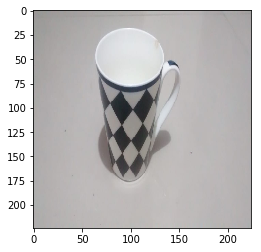

In [28]:
from matplotlib.pyplot import imshow
imshow(arr[3])

In [41]:
from keras.preprocessing.image import ImageDataGenerator
R_R = 20
W_S = 0.2
H_S = 0.2
datagen = ImageDataGenerator(
    rotation_range=R_R,
    width_shift_range=W_S,
    height_shift_range=H_S,) #Data Augmentation

In [42]:
aug_iter = datagen.flow(arr)

In [43]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(100)]
X_train_own = np.array(aug_images)
X_train_own.shape

(100, 224, 224, 3)

In [44]:
import matplotlib.pyplot as plt
from scipy import misc, ndimage

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')


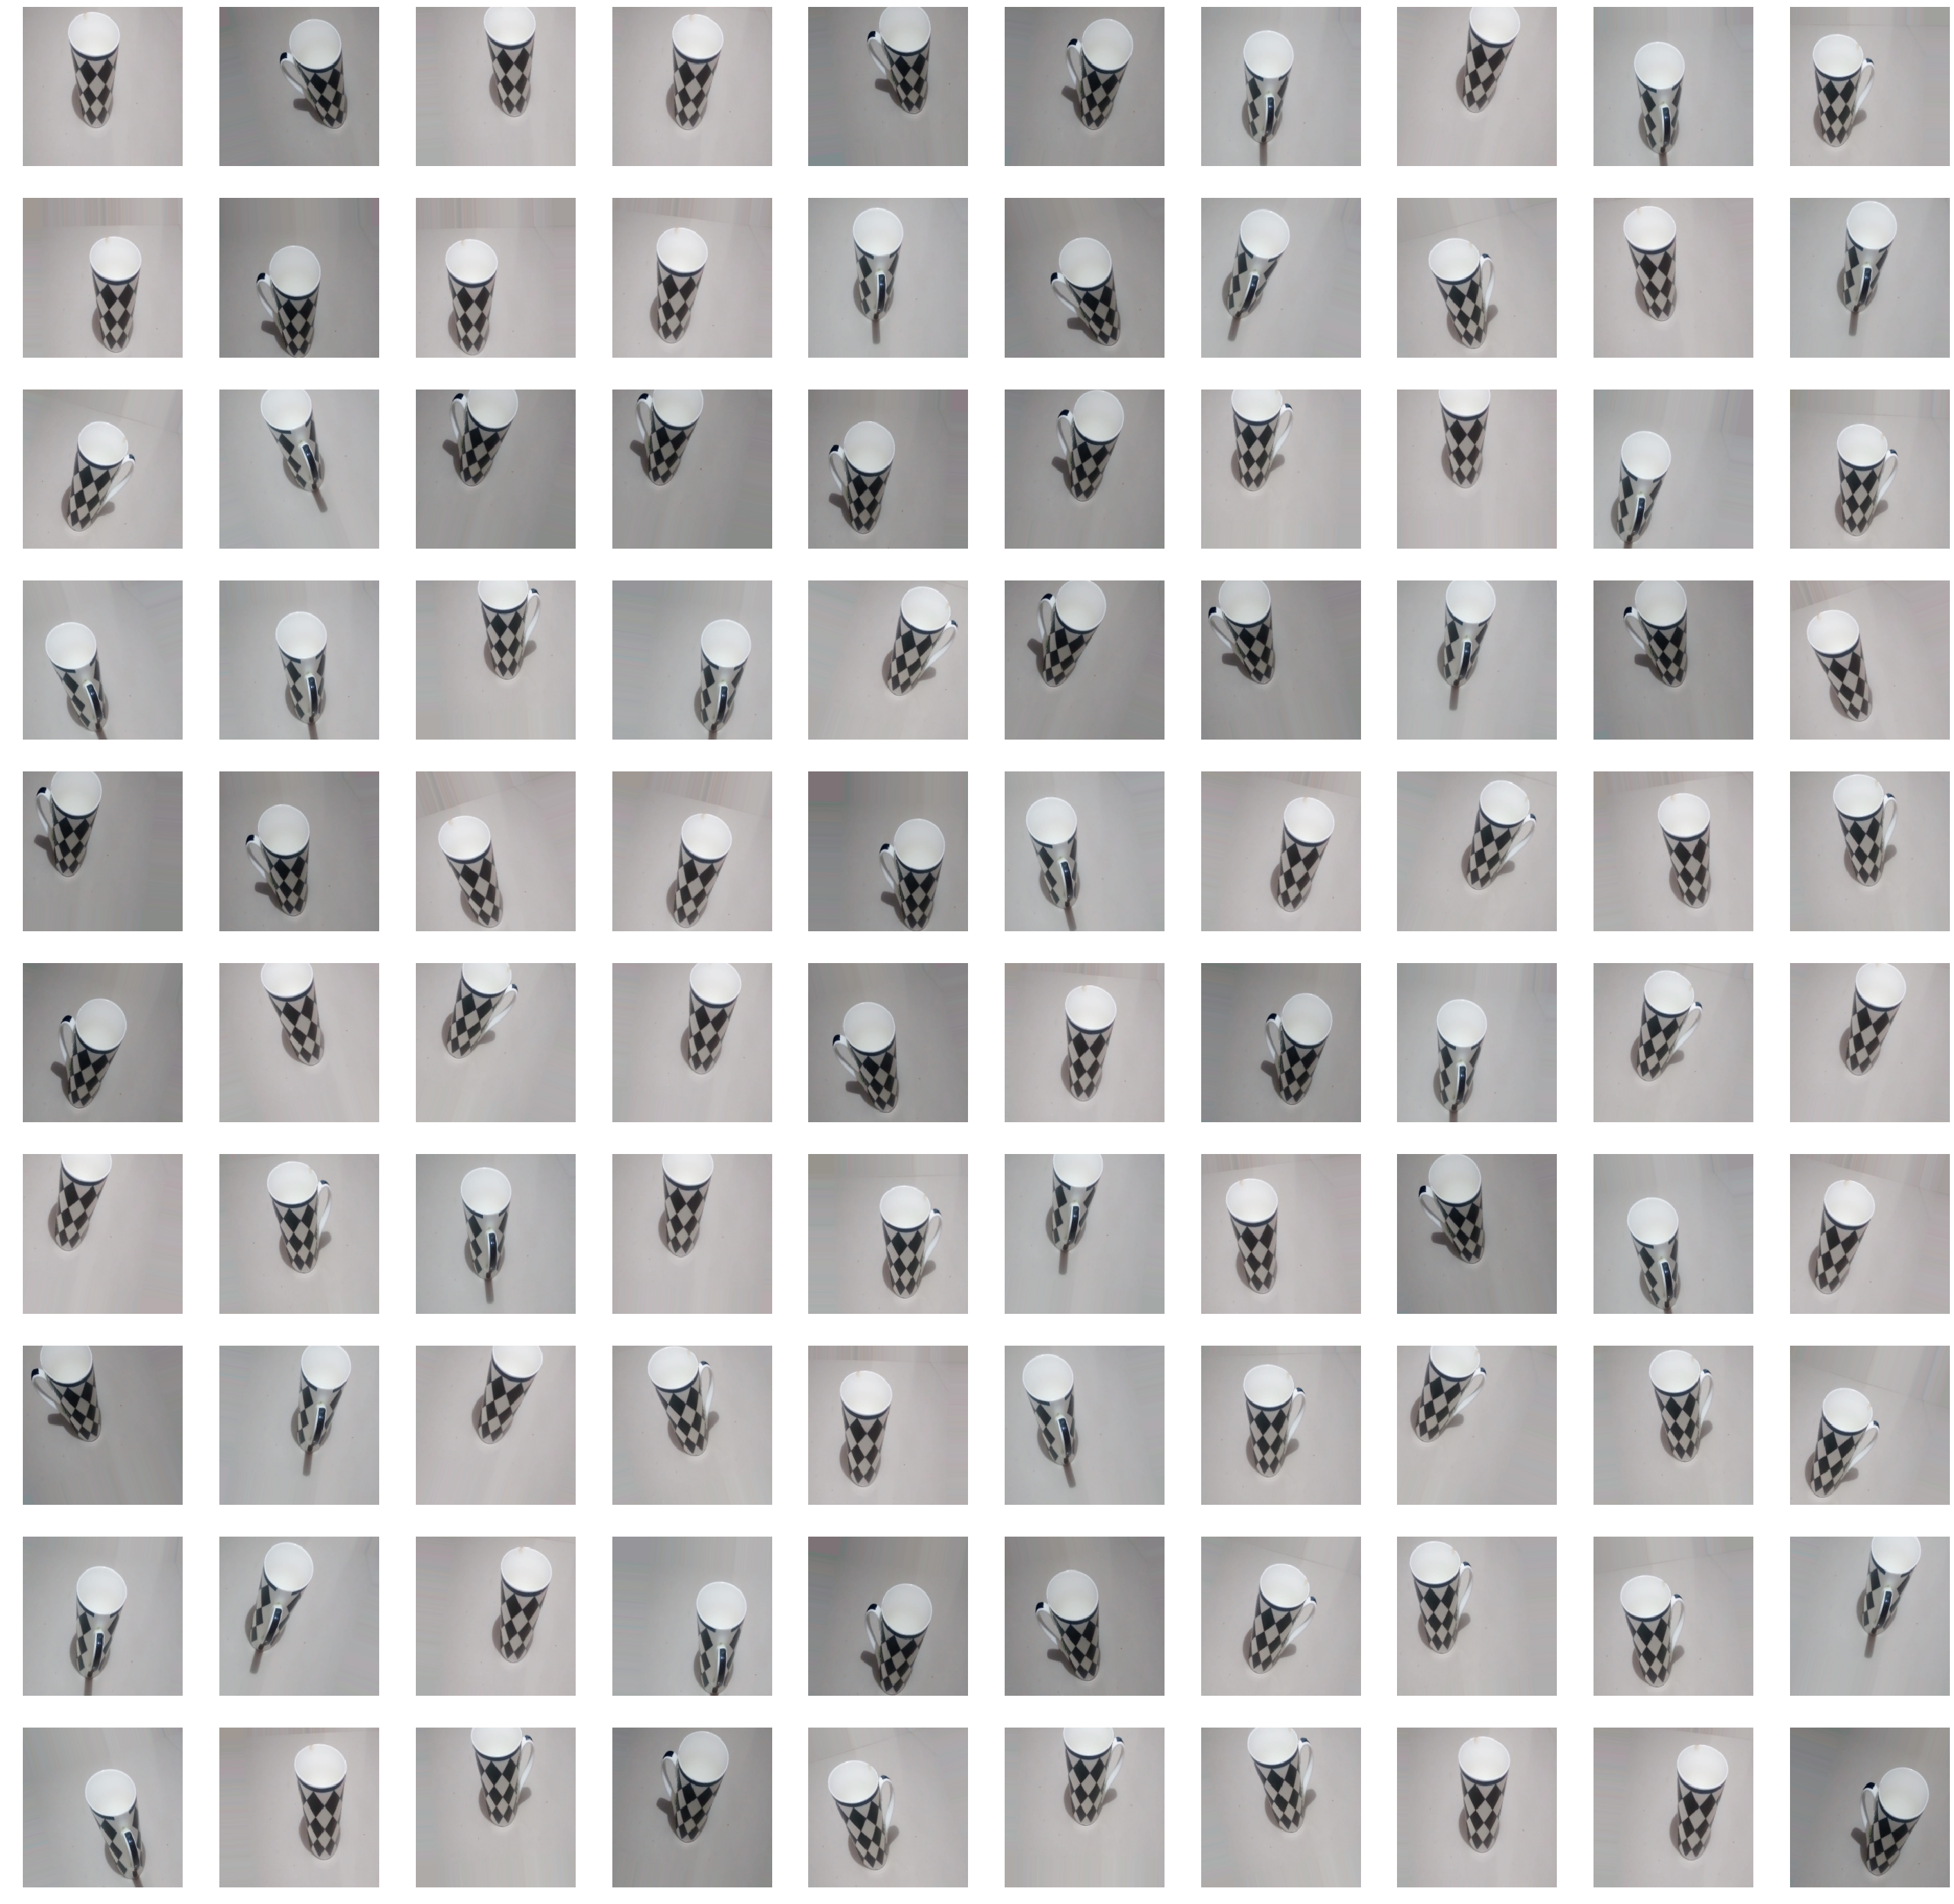

In [46]:
plots(aug_images, figsize=(50,50), rows=10)